# Discription

Concrete is commonly used in all kinds of construction projects. It is very important to have concrete with reliable properties as it may cause really serious problems if construction materials fail suddenly. Concrete is made up of many different components, which, after being mixed up and stirred, can be used for civil engineering projects. The composition of the components determine the compressive strength of concrete. To get the true compressive strength of concrete, engineers need to break cylinder samples under a compression testing machine. The breaking load is divided by the cross section of the cylinder to obtain the compressive strength. This is an expensive and time-consuming process which could be avoided with the proper machine learning models.

# Import library and data

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
df= pd.read_csv('/Users/shencong/Concrete_Data.csv')

In [6]:
##This is the link of the dataset https://www.kaggle.com/datasets/sinamhd9/concrete-comprehensive-strength/download

In [7]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [8]:
df.shape

(1030, 9)

## rename variables

In [9]:
columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_slag',
        'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
        'Water  (component 4)(kg in a m^3 mixture)':'water',
        'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate',
        'Age (day)':'age','Concrete compressive strength(MPa, megapascals) ':'concrete_compressive_strength'}
df.rename(columns=columns,inplace=True)

# Data analysis

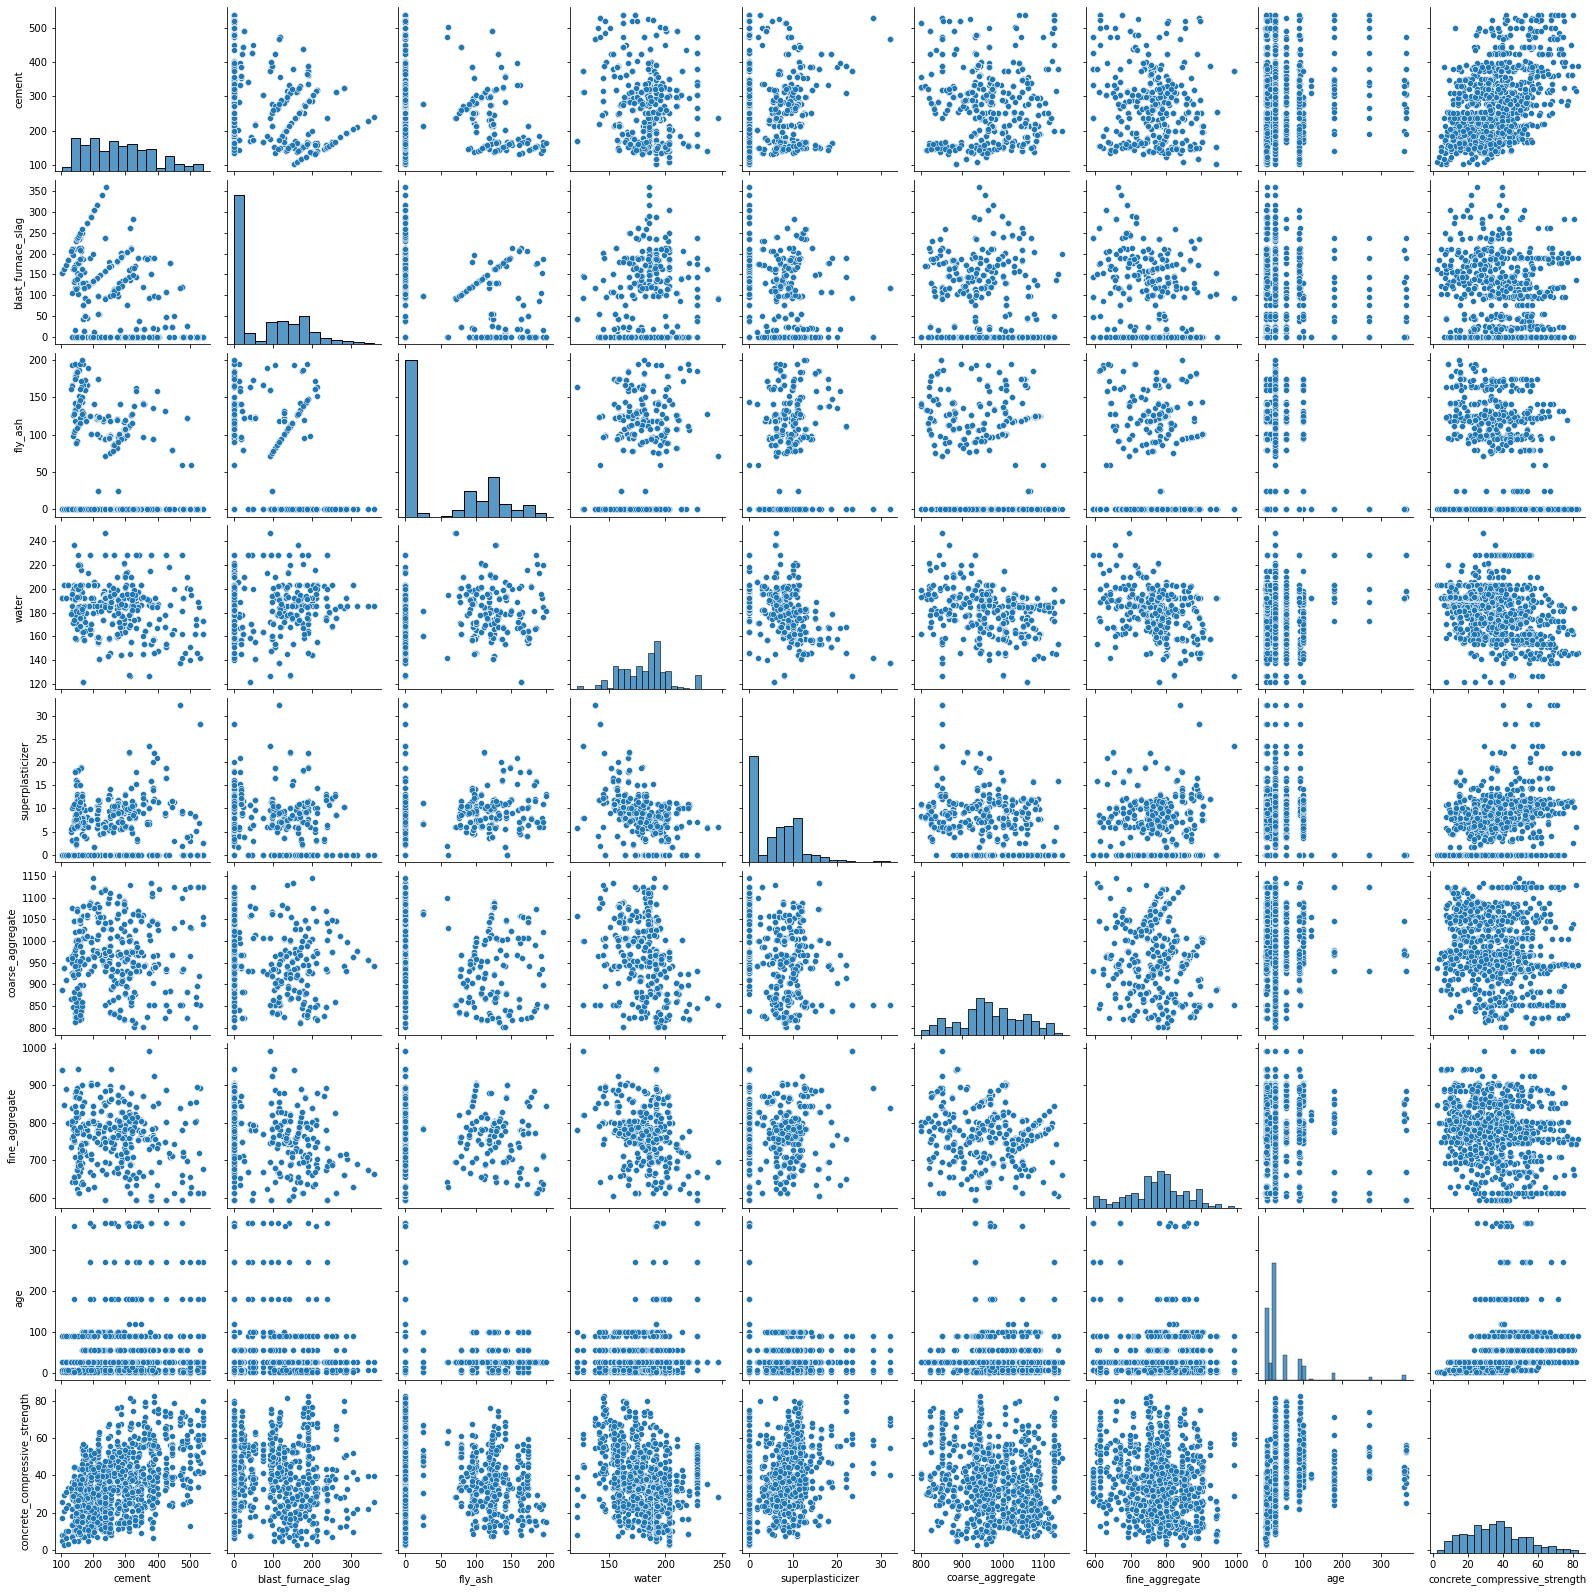

In [8]:
sns.pairplot(df)

# Normalization

In [10]:
cols = df.columns
sc = StandardScaler()
X = pd.DataFrame(columns=cols[:-1], data=sc.fit_transform(df.drop('concrete_compressive_strength',axis=1)))
display(X.head(3))
y = df['concrete_compressive_strength']
display(y.head(3))

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066


0    79.99
1    61.89
2    40.27
Name: concrete_compressive_strength, dtype: float64

## Split data

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Training and find the best model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [13]:
models=[LinearRegression(),
        Ridge(),
        SGDRegressor(penalty='l2'),
        LinearSVR(),KNeighborsRegressor(),
        DecisionTreeRegressor(),
        xgb.XGBRegressor(objective='reg:linear'),
        AdaBoostRegressor(),
        BaggingRegressor(),
        GradientBoostingRegressor(max_depth=1),
        RandomForestRegressor()
       ]
models_str=['linreg',
           'ridge',
           'sgd_reg',
           'svr',
           'knn',
           'dt',
           'xg_re',
           'ad',
           'br',
           'gbr',
           'rfr'
           ]
score_=[]

In [14]:
for model_name ,model in zip(models_str,models):
    print('Start training '+model_name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=model.score(X_test,y_test)
    score_.append(str(score))
    print(model_name+' score '+str(score))
df_score=pd.DataFrame([models_str])

Start training linreg
linreg score 0.6150543971037099
Start training ridge
ridge score 0.6155495757924899
Start training sgd_reg
sgd_reg score 0.617684418211911
Start training svr
svr score 0.617466438895054
Start training knn
knn score 0.7108381372494854
Start training dt
dt score 0.842292821939653
Start training xg_re
[23:18:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
xg_re score 0.9352047777827694
Start training ad


/Users/shencong/opt/anaconda3/envs/p4e/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/shencong/opt/anaconda3/envs/p4e/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


ad score 0.7645496943937515
Start training br
br score 0.888738417822845
Start training gbr
gbr score 0.7922888478660401
Start training rfr
rfr score 0.8939763160966259


In [15]:
df=df_score.T
df['score']=score_
df=df.sort_values(by='score',ascending=False)
df=df.rename(columns={0:'name'})
df.set_index('name')
print(df)

       name               score
6     xg_re  0.9352047777827694
10      rfr  0.8939763160966259
8        br   0.888738417822845
5        dt   0.842292821939653
9       gbr  0.7922888478660401
7        ad  0.7645496943937515
4       knn  0.7108381372494854
2   sgd_reg   0.617684418211911
3       svr   0.617466438895054
1     ridge  0.6155495757924899
0    linreg  0.6150543971037099


In [16]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC

In [47]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),):

    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)


    # Plot learning curve
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
        label="+/- 1 SD mean of train"
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
        label="+/- 1 SD mean of test"
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")

    return plt

## Extreme Gradient Boosting

<module 'matplotlib.pyplot' from '/Users/shencong/opt/anaconda3/envs/p4e/lib/python3.9/site-packages/matplotlib/pyplot.py'>

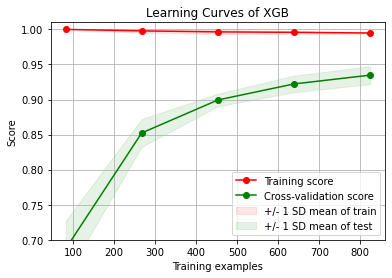

In [55]:
title = "Learning Curves of XGB"
estimator = xgb.XGBRegressor()
cv = ShuffleSplit(test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

## Random Forest

<module 'matplotlib.pyplot' from '/Users/shencong/opt/anaconda3/envs/p4e/lib/python3.9/site-packages/matplotlib/pyplot.py'>

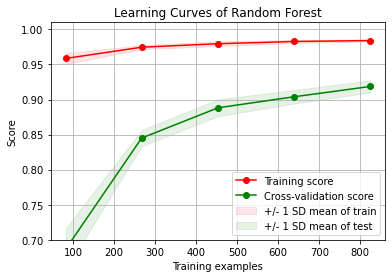

In [53]:
title = "Learning Curves of Random Forest"
estimator = RandomForestRegressor()
cv = ShuffleSplit(test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

## Bagging Regressor

<module 'matplotlib.pyplot' from '/Users/shencong/opt/anaconda3/envs/p4e/lib/python3.9/site-packages/matplotlib/pyplot.py'>

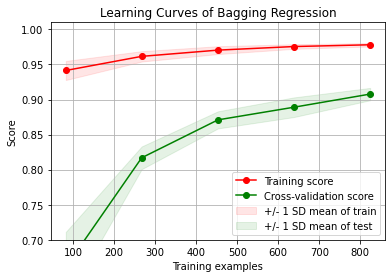

In [50]:
title = "Learning Curves of Bagging Regression"
estimator = BaggingRegressor()
cv = ShuffleSplit(test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

##  Gradient Boosting Regressor

<module 'matplotlib.pyplot' from '/Users/shencong/opt/anaconda3/envs/p4e/lib/python3.9/site-packages/matplotlib/pyplot.py'>

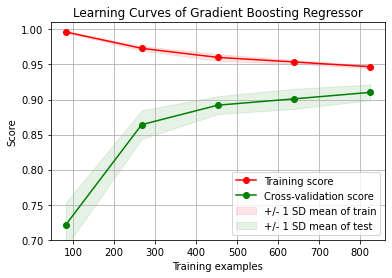

In [56]:
title = "Learning Curves of Gradient Boosting Regressor"
estimator = GradientBoostingRegressor()
cv = ShuffleSplit(test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

## Linear regression

<module 'matplotlib.pyplot' from '/Users/shencong/opt/anaconda3/envs/p4e/lib/python3.9/site-packages/matplotlib/pyplot.py'>

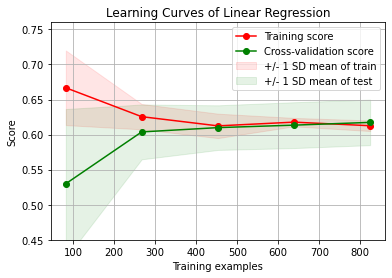

In [52]:
title = "Learning Curves of Linear Regression"
estimator = LinearRegression()
cv = ShuffleSplit(test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.45, 0.76), cv=cv, n_jobs=4)